## Install Turicreate library

In [1]:
import sys
!{sys.executable} -m pip install -U  turicreate

Requirement already up-to-date: turicreate in /anaconda/envs/azureml_py38/lib/python3.8/site-packages (6.4.1)


# Data Wrangling

## Load the datasets ( Transactions, Items, Users)

In [2]:
import pandas as pd
import os

DATA_DIR = "./data/final/"
OUTPUT_DIR = "./output/"
MODELS_DIR = "./models/"
purchases_filename = "purchasehistory_final.csv"
products_filename = "product_final.csv"
customer_filename = "customers_final.csv"

order_column_name = "order_id"
product_column_name = "product_id"
seller_column_name = "seller_id"
category_column_name = "product_category_name_english"
avgreview_column_name = "average_review_score"
reviewscore_column_name = "review_score"
customer_column_name = "customer_unique_id"
customer_city_column_name = "customer_city"

os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

df = pd.read_csv(DATA_DIR+purchases_filename)
df_p = pd.read_csv(DATA_DIR+products_filename)
df_c = pd.read_csv(DATA_DIR+customer_filename)

In [3]:
print(df.shape)
print(df_p.shape)
print(df_c.shape)

(110750, 36)
(110750, 4)
(15083455, 9)


In [4]:
df.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,month,weekday,period
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,9,2,Morning


In [5]:
df.tail(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,month,weekday,period
110749,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79,96d649da0cc4ff33bb408b199d4c7dcf,delivered,2018-06-09 17:00:18,...,bed_bath_table,b2700869a37f1aafc9dda829dc2f9027,5,NaN,NaN,2018-06-15 00:00:00,2018-06-17 21:27:09,6,5,Evening


### See some row samples from the dataframes

In [6]:
df.iloc[0]

order_id                                       00010242fe8c5a6d1ba2dd792cb16214
order_item_id                                                                 1
product_id                                     4244733e06e7ecb4970a6e2683c13e61
seller_id                                      48436dade18ac8b2bce089ec2a041202
shipping_limit_date                                         2017-09-19 09:45:35
price                                                                      58.9
freight_value                                                             13.29
customer_id                                    3ce436f183e68e07877b285a838db11a
order_status                                                          delivered
order_purchase_timestamp                                    2017-09-13 08:59:02
order_approved_at                                           2017-09-13 09:45:35
order_delivered_carrier_date                                2017-09-19 18:34:16
order_delivered_customer_date           

In [7]:
df_p.query(product_column_name + ' == ' + '"'+ str(df.iloc[0][product_column_name]) + '"')

,product_id,average_review_score,product_category_name_english,seller_id
29160,4244733e06e7ecb4970a6e2683c13e61,4.444444,cool_stuff,48436dade18ac8b2bce089ec2a041202
29161,4244733e06e7ecb4970a6e2683c13e61,4.444444,cool_stuff,48436dade18ac8b2bce089ec2a041202
29162,4244733e06e7ecb4970a6e2683c13e61,4.444444,cool_stuff,48436dade18ac8b2bce089ec2a041202
29163,4244733e06e7ecb4970a6e2683c13e61,4.444444,cool_stuff,48436dade18ac8b2bce089ec2a041202
29164,4244733e06e7ecb4970a6e2683c13e61,4.444444,cool_stuff,48436dade18ac8b2bce089ec2a041202
29165,4244733e06e7ecb4970a6e2683c13e61,4.444444,cool_stuff,48436dade18ac8b2bce089ec2a041202
29166,4244733e06e7ecb4970a6e2683c13e61,4.444444,cool_stuff,48436dade18ac8b2bce089ec2a041202
29167,4244733e06e7ecb4970a6e2683c13e61,4.444444,cool_stuff,48436dade18ac8b2bce089ec2a041202
29168,4244733e06e7ecb4970a6e2683c13e61,4.444444,cool_stuff,48436dade18ac8b2bce089ec2a041202


In [8]:
df_c.query(customer_column_name + ' == ' + '"'+ str(df.iloc[0][customer_column_name]) + '"')

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_id,customer_unique_id,customer_city,customer_state
8337711,28013,-21.758076,-41.312633,campos dos goytacazes,RJ,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
8337725,28013,-21.758843,-41.306754,campos dos goytacazes,RJ,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
8337739,28013,-21.767046,-41.311328,campos dos goytacazes,RJ,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
8337753,28013,-21.771661,-41.312119,campos dos goytacazes,RJ,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
8337767,28013,-21.763006,-41.306182,campos dos goytacazes,RJ,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
...,...,...,...,...,...,...,...,...,...
8339727,28013,-21.757675,-41.307462,campos dos goytacazes,RJ,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
8339741,28013,-21.758679,-41.300239,campos dos goytacazes,RJ,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
8339755,28013,-21.767661,-41.305460,campos dos goytacazes,RJ,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
8339769,28013,-21.762628,-41.309190,campos dos goytacazes,RJ,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ


## Transactions Unique values

In [9]:
df.nunique(axis=0)

order_id                         96517
order_item_id                       21
product_id                       32171
seller_id                         3028
shipping_limit_date              91387
price                             5879
freight_value                     6954
customer_id                      96517
order_status                         7
order_purchase_timestamp         95990
order_approved_at                88333
order_delivered_carrier_date     79242
order_delivered_customer_date    93703
order_estimated_delivery_date      450
customer_unique_id               93397
customer_zip_code_prefix         14907
customer_city                     4093
customer_state                      27
product_category_name               71
product_name_lenght                 66
product_description_lenght        2958
product_photos_qty                  19
product_weight_g                  2197
product_length_cm                   99
product_height_cm                  102
product_width_cm         

In [10]:
df.period.unique()

array(['Morning', 'Evening', 'Night', 'Noon', 'Late Night',
       'Early Morning'], dtype=object)

## Popularity -> Transactions: Sum of unique values

In [11]:
df_popularity = df.groupby(product_column_name)[product_column_name].count().sort_values('index',ascending=False)

### This will show us how many times products have been ordered

In [12]:
df_popularity.head(5)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    524
422879e10f46682990de24d770e7f83d    486
99a4788cb24856965c36a24e339b6058    482
389d119b48cf3043d311335e499d9c6b    391
368c6c730842d78016ad823897a372db    388
Name: product_id, dtype: int64

## Most Active Customers user_ids

In [13]:
df_c_popularity = df.groupby(customer_column_name)[customer_column_name].count().sort_values('index',ascending=False)

### This will show us how many orders customers have made

In [14]:
df_c_popularity

customer_unique_id
c8460e4251689ba205045f3ea17884a1    24
d97b3cfb22b0d6b25ac9ed4e9c2d481b    24
4546caea018ad8c692964e3382debd19    21
c402f431464c72e27330a67f7b94d4fb    20
0f5ac8d5c31de21d2f25e24be15bbffb    18
                                    ..
a4b49136fdbfe77c71fe152e2c45f30a     1
a4b5f9c363d6a5fe33c0cc046c375a6d     1
a4b69f3f2b0ea381b62b3589d8c47b51     1
a4b6a03e92678c108c7490588e68666c     1
0000366f3b9a7992bf8c76cfdf3221e2     1
Name: customer_unique_id, Length: 93397, dtype: int64

## Check NaN values

In [15]:
print("Number of rows", df.shape[0])
df.apply(lambda x: sum(x.isnull()))

Number of rows 110750


order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1145
order_delivered_customer_date     2293
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     1
product_length_cm                    1
product_height_cm                    1
product_width_cm         

In [90]:
print("Number of rows", df_c.shape[0])
df_c.apply(lambda x: sum(x.isnull()))

Number of rows 15083455


customer_zip_code_prefix    0
geolocation_lat             0
geolocation_lng             0
geolocation_city            0
geolocation_state           0
customer_id                 0
customer_unique_id          0
customer_city               0
customer_state              0
dtype: int64

In [17]:
print("Number of rows", df_p.shape[0])
df_p.apply(lambda x: sum(x.isnull()))

Number of rows 110750


product_id                       0
average_review_score             0
product_category_name_english    0
seller_id                        0
dtype: int64

In [18]:
# Remove NaNs
import numpy as np

df = df.replace({np.nan: None})
df_p = df_p.replace({np.nan: None})
# df_c = df_c.replace({np.nan: None})

df = df.dropna()
# df_c = df_c.dropna()
df_p = df_p.dropna()

In [19]:
df.nunique(axis=0)

order_id                         9436
order_item_id                      13
product_id                       6011
seller_id                        1510
shipping_limit_date              9349
price                            1909
freight_value                    3044
customer_id                      9436
order_status                        1
order_purchase_timestamp         9415
order_approved_at                8986
order_delivered_carrier_date     7545
order_delivered_customer_date    9402
order_estimated_delivery_date     153
customer_unique_id               9333
customer_zip_code_prefix         5837
customer_city                    1578
customer_state                     27
product_category_name              66
product_name_lenght                55
product_description_lenght       1858
product_photos_qty                 13
product_weight_g                 1000
product_length_cm                  92
product_height_cm                  87
product_width_cm                   75
product_cate

## Suggested pre-processing techniques
Lastly, here are a couple of common data issues that can affect the performance of a recommender. First, if the observation data is very sparse, i.e., contains only one or two observations for a large number of users, then none of the models will perform much better than the simple baselines available via the popularity_recommender. In this case, it might help to prune out the rare users and rare items and try again. Also, re-examine the data collection and data cleaning process to see if mistakes were made. Try to get more observation data per user and per item, if you can.

Another issue often occurs when usage data is treated as ratings. Unlike explicit ratings that lie on a nice linear interval, say 0 to 5, usage data can be badly skewed. For instance, in the Million Song dataset, one user played a song more than 16,000 times. All the models would have a difficult time fitting to such a badly skewed target. The fix is to bucketize the usage data. For instance, any play count greater than 50 can be mapped to the maximum rating of 5. You can also clip the play counts to be binary, e.g., any number greater than 2 is mapped to 1, otherwise it's 0.

In [20]:
# Remove Rare customers and rare items in the transactions df

desired_users_quantile = 0.8
desired_items_quantile = 0.5

df1 = df.groupby(customer_column_name).agg(count=(customer_column_name, 'count')).sort_values('count',ascending=False)
df2 = df.groupby(product_column_name).agg(count=(product_column_name, 'count')).sort_values('count',ascending=False)

print("The",desired_users_quantile ,"quantile of number of transactions per customer is: ",df1['count'].quantile(desired_users_quantile)," transactions")
print("The number of rows before removing rare customers is:",len(df1))
df1 = df1[df1['count'] >= df1['count'].quantile(desired_users_quantile)]
print("The number of rows after removing rare customers is:",len(df1))

print("\nThe",desired_items_quantile ,"quantile of number of transactions per item is: ",df2['count'].quantile(desired_items_quantile)," transactions")
print("The number of rows before removing rare items is:",len(df2))
df2 = df2[df2['count'] >= df2['count'].quantile(desired_items_quantile)]
print("The number of rows after removing rare items is:",len(df2))


The 0.8 quantile of number of transactions per customer is:  1.0  transactions
The number of rows before removing rare customers is: 9333
The number of rows after removing rare customers is: 9333

The 0.5 quantile of number of transactions per item is:  1.0  transactions
The number of rows before removing rare items is: 6011
The number of rows after removing rare items is: 6011


In [21]:
print("\nNumber of transactions before removing rare customers",len(df))
dft = pd.merge(df, df1, on=[customer_column_name], how='inner')
print("Number of transactions after removing rare customers",len(dft))

print("\nNumber of transactions before removing rare items",len(dft))
df_final = pd.merge(dft, df2, on=[product_column_name], how='inner')
print("Number of transactions after removing rare items",len(df_final))


Number of transactions before removing rare customers 11173
Number of transactions after removing rare customers 11173

Number of transactions before removing rare items 11173
Number of transactions after removing rare items 11173


In [22]:
df_final = df_final.drop(['count_x','count_y'], axis=1)
df_final

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,month,weekday,period
0,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,cool_stuff,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,5,4,Morning
1,bd486e41e0b895151c98b33db1504f8d,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-23 00:10:14,12.99,12.79,35e87ef5e133284e1e2ccbc8f8816d57,delivered,2018-08-17 23:59:46,...,perfumery,a0c322134317c923d99a2d3a5fc3b462,4,Muito bom,Amei o produto,2018-08-28 00:00:00,2018-08-28 22:30:41,8,4,Night
2,398545ae905dad286c70f01c7e7311e1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-04-12 03:28:44,59.99,19.39,8241b47bcf8f1250d9d5416c4f8cd9bb,delivered,2018-04-04 21:12:12,...,health_beauty,fce2fd5d7a5775c8bf4e7186cd00aab3,5,Ótimo,"O produto foi entregue antes do prazo, em perf...",2018-04-29 00:00:00,2018-04-29 19:40:25,4,2,Night
3,398545ae905dad286c70f01c7e7311e1,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-04-12 03:28:44,59.99,19.39,8241b47bcf8f1250d9d5416c4f8cd9bb,delivered,2018-04-04 21:12:12,...,health_beauty,fce2fd5d7a5775c8bf4e7186cd00aab3,5,Ótimo,"O produto foi entregue antes do prazo, em perf...",2018-04-29 00:00:00,2018-04-29 19:40:25,4,2,Night
4,3b61275de41f60d8e48bef3f42ac8bed,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-06-12 21:30:34,59.99,11.15,cfea8643620e714a7f1344226e2bc21c,delivered,2018-06-10 21:08:01,...,health_beauty,c6c824bd4de283e5dcda39d2de81a249,4,bom,produto de acordo com o preço.,2018-06-14 00:00:00,2018-06-15 21:22:18,6,6,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11168,ffcb98e21b0bf085baf42b16a67732ef,1,0c398b245c9b74ef2bf4343b6fe73237,bd4889b5e9133b35b66e42a8665cea5c,2018-06-14 14:53:16,91.8,7.51,d5b03af823742e307896a30d43e41340,delivered,2018-06-06 14:25:51,...,furniture_decor,38746e8fc612cf700a2e1bffd8412a39,5,Recomendo,Muito satisfeita,2018-06-13 00:00:00,2018-06-13 20:28:42,6,2,Noon
11169,ffd6f465cab015b452d398ac1f5d978a,1,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,0b5f60cff1a206e0bc33c120b8db0335,delivered,2018-04-23 19:33:08,...,christmas_supplies,cb864e5bb7299e87df2bf1eb66fddbcd,4,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04 00:00:00,2018-05-05 01:32:43,4,0,Evening
11170,ffd6f465cab015b452d398ac1f5d978a,2,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,0b5f60cff1a206e0bc33c120b8db0335,delivered,2018-04-23 19:33:08,...,christmas_supplies,cb864e5bb7299e87df2bf1eb66fddbcd,4,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04 00:00:00,2018-05-05 01:32:43,4,0,Evening
11171,ffd6f465cab015b452d398ac1f5d978a,3,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,0b5f60cff1a206e0bc33c120b8db0335,delivered,2018-04-23 19:33:08,...,christmas_supplies,cb864e5bb7299e87df2bf1eb66fddbcd,4,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04 00:00:00,2018-05-05 01:32:43,4,0,Evening


In [23]:
# print("Number of rows", df_final.shape[0])
# df_final.apply(lambda x: sum(x.isnull()))

## Drop Duplicate transactions to balance dataset better (except in review score column)

In [24]:
# df_final.drop_duplicates(subset=['review_score'], keep='first', inplace=True)
df_balanced = df_final
print(df_final.shape)
print(df_balanced.shape)

(11173, 36)
(11173, 36)


In [25]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)

df_bal_pop = df_balanced.groupby(product_column_name).agg(count=(product_column_name, 'count')).sort_values('count',ascending=False)

pd.merge(df_bal_pop, df_p, on=[product_column_name], how='left').head(20)

,product_id,count,average_review_score,product_category_name_english,seller_id
0,53b36df67ebb7c41585e8d54d6772e08,69,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
1,53b36df67ebb7c41585e8d54d6772e08,69,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
2,53b36df67ebb7c41585e8d54d6772e08,69,4.190625,watches_gifts,4869f7a5dfa277a7dca6462dcf3b52b2
3,53b36df67ebb7c41585e8d54d6772e08,69,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
4,53b36df67ebb7c41585e8d54d6772e08,69,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
5,53b36df67ebb7c41585e8d54d6772e08,69,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
6,53b36df67ebb7c41585e8d54d6772e08,69,4.190625,watches_gifts,4869f7a5dfa277a7dca6462dcf3b52b2
7,53b36df67ebb7c41585e8d54d6772e08,69,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
8,53b36df67ebb7c41585e8d54d6772e08,69,4.190625,watches_gifts,4869f7a5dfa277a7dca6462dcf3b52b2
9,53b36df67ebb7c41585e8d54d6772e08,69,4.190625,watches_gifts,58f1a6197ed863543e0136bdedb3fce2


In [26]:
df_bal_pop.drop(df_bal_pop.head(50).index)

,count
product_id,
363218ba55c610b750224f90bdd34be1,14
c3ba4e8d3cb30049213b682e751e9d00,14
d34c07a2d817ac73f4caf8c574215fed,14
06edb72f1e0c64b14c5b79353f7abea3,14
c9c6fde711572c1ad99ca12728c6af00,14
...,...
72b95452ea4355dd9f749878759c92d0,1
72b61ed035f5576359ccf0d2ec7bddf2,1
151259fe8ced305ca05dc771fc72d711,1


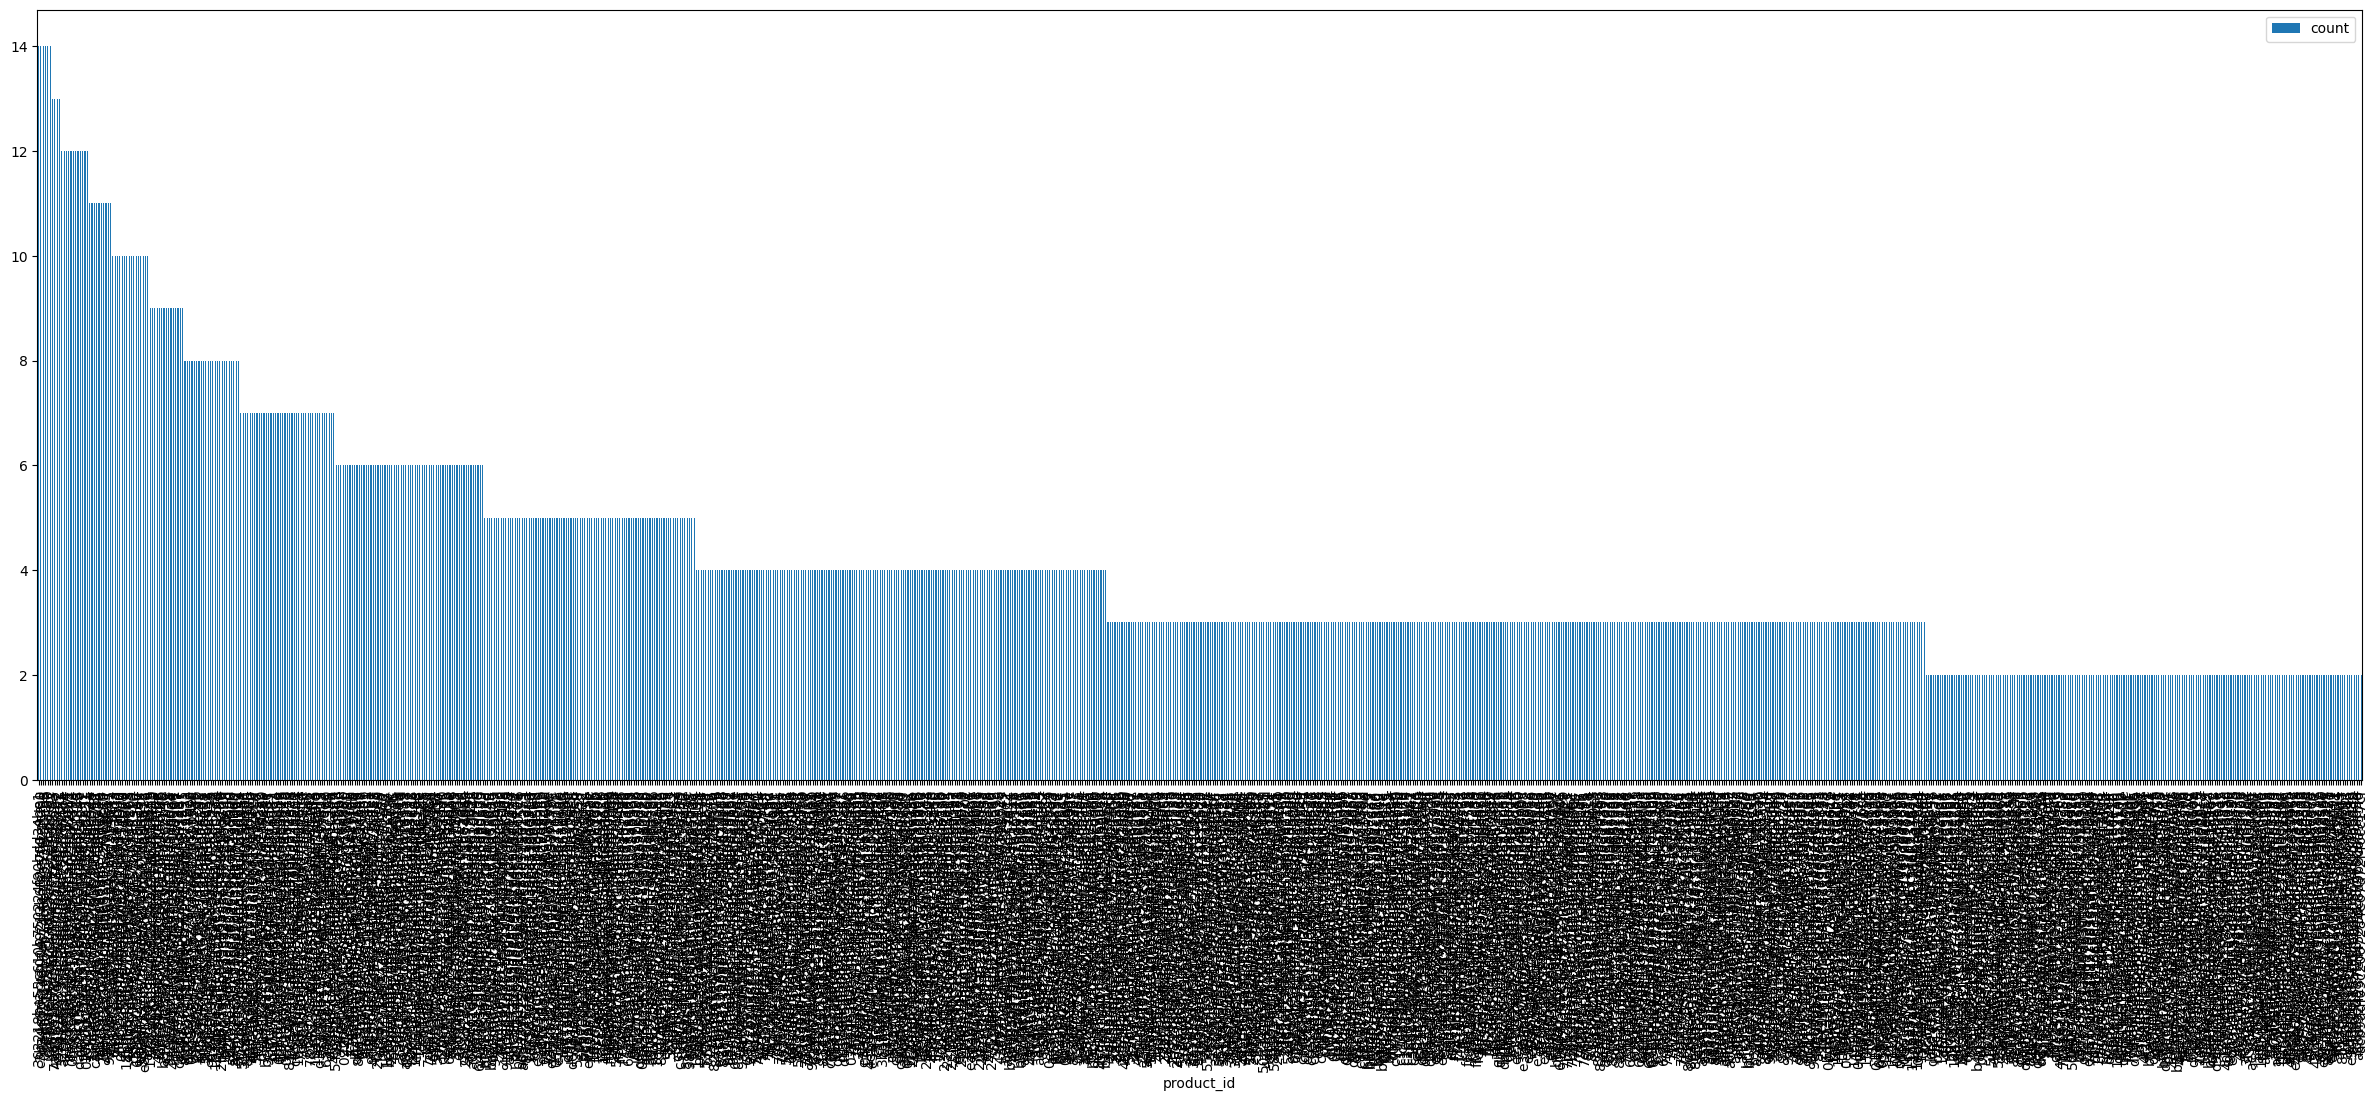

In [27]:
# Plot the distribution of top 1000 popular items that are NOT the top 50
df_bal_pop.drop(df_bal_pop.head(50).index).head(1000).plot.bar()

## Encode the target

In [ ]:
# I want to set the target based off the range of the review score. For this I am going to set an upper and lower bound so I can use it in my target calculation
lb1 = 0
ub1 = 1

lb2 = 2
ub2 = 3

lb3 = 4
ub3 = 5

In [30]:
print(df_balanced['review_score'].dtypes)

int64


In [31]:
df_balanced['review_score'] = df_balanced['review_score'].astype(str)

In [34]:
df_balanced['target'] = df_balanced['review_score'].map({'0':0,'1':2,'2':6,'3':10,'4':16,'5':24})

# df_balanced['target'] = df_balanced((([reviewscore_column_name].between(lb1, ub1, 1, 0)),([reviewscore_column_name].between(lb2, ub2, 5, 0))),[reviewscore_column_name].between(lb3, ub3, 10, 0))

In [35]:
df_balanced["target"].value_counts()

24    5984
2     2091
16    1649
10     894
6      555
Name: target, dtype: int64

In [36]:
df_balanced.drop(columns=[reviewscore_column_name], inplace=True)

## Check datasets before modeling

In [37]:
print("Number of rows", df_balanced.shape[0])
df_balanced.apply(lambda x: sum(x.isnull()))

Number of rows 11173


order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
review_id                        0
review_comment_title

In [38]:
df_balanced[df_balanced.isna().any(axis=1)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_category_name_english,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,month,weekday,period,target


In [39]:
print("Number of rows", df_c.shape[0])
df_c.apply(lambda x: sum(x.isnull()))

Number of rows 15083455


customer_zip_code_prefix    0
geolocation_lat             0
geolocation_lng             0
geolocation_city            0
geolocation_state           0
customer_id                 0
customer_unique_id          0
customer_city               0
customer_state              0
dtype: int64

In [40]:
print("Number of rows", df_p.shape[0])
df_p.apply(lambda x: sum(x.isnull()))

Number of rows 110750


product_id                       0
average_review_score             0
product_category_name_english    0
seller_id                        0
dtype: int64

# Modeling

## Create the SFrames that Turicreate needs for the recommender

In [41]:
import turicreate
from turicreate import SFrame

In [42]:
sf = SFrame(data=df_balanced)

In [43]:
sf.show()

Materializing SFrame

In [44]:
sf_p = SFrame(data=df_p)

In [45]:
sf_p

product_id,average_review_score,product_category_name_english ...,seller_id
00066f42aeeb9f3007548bb9d3f33c38 ...,5.0,perfumery,5670f4db5b62c43d542e1b2d56b0cf7c ...
00088930e925c41fd95ebfe695fd2655 ...,4.0,auto,7142540dd4c91e2237acb7e911c4eba2 ...
0009406fd7479715e4bef61dd91f2462 ...,1.0,bed_bath_table,4a3ca9315b744ce9f8e9374361493884 ...
000b8f95fcb9e0096488278317764d19 ...,5.0,housewares,40ec8ab6cdafbcc4f544da38c67da39a ...
000b8f95fcb9e0096488278317764d19 ...,5.0,housewares,40ec8ab6cdafbcc4f544da38c67da39a ...
000d9be29b5207b54e86aa1b1ac54872 ...,5.0,watches_gifts,8ae520247981aa06bc94abddf5f46d34 ...
0011c512eb256aa0dbbb544d8dffcf6e ...,1.0,auto,b4ffb71f0cb1b1c3d63fad021ecf93e1 ...
00126f27c813603687e6ce486d909d01 ...,5.0,cool_stuff,cd68562d3f44870c08922d380acae552 ...
00126f27c813603687e6ce486d909d01 ...,5.0,cool_stuff,cd68562d3f44870c08922d380acae552 ...
001795ec6f1b187d37335e1c4704762e ...,3.2222222222222223,consoles_games,8b321bb669392f5163d04c59e235e066 ...


In [46]:
sf_c = SFrame(data=df_c)

In [47]:
sf_c.show()

Materializing SFrame

## Spliting Dataset in Training and Testing

In [48]:
df_c_popularity[df_c_popularity < df_c_popularity.quantile(0.80)].index

Index([], dtype='object', name='customer_unique_id')

In [49]:
df_balanced[customer_column_name]

0        3419052c8c6b45daf79c1e426f9e9bcb
1        9c9227591acfad49c19e7fd98f6fef02
2        f2f850bf414ea87b12ddcd13a910bd68
3        f2f850bf414ea87b12ddcd13a910bd68
4        a81f69b81336c62eec8de5b0c2996e02
                       ...               
11168    71f00016b4141f7b1e313029cc7d887a
11169    57739105dd34b4fa8b3c1974c0af2b38
11170    57739105dd34b4fa8b3c1974c0af2b38
11171    57739105dd34b4fa8b3c1974c0af2b38
11172    6719131c8ace6580220a889e8630624d
Name: customer_unique_id, Length: 11173, dtype: object

In [50]:
high_rated_data = SFrame(data=df_balanced[df_balanced[customer_column_name].isin(df_c_popularity[df_c_popularity >= df_c_popularity.quantile(0.98)].index.tolist())])

low_rated_data = SFrame(data=df_balanced[df_balanced[customer_column_name].isin(df_c_popularity[df_c_popularity < df_c_popularity.quantile(0.98)].index.tolist())])
train_data_1, test_sf = turicreate.recommender.util.random_split_by_user(high_rated_data, 
                                                                     user_id=customer_column_name, 
                                                                     item_id=product_column_name)

train_sf = train_data_1.append(low_rated_data)

In [51]:
train_sf.head()

order_id,order_item_id,product_id,seller_id
1aa9e8f35ac38d8a10b41441e1faa0a2 ...,1,99a4788cb24856965c36a24e339b6058 ...,4a3ca9315b744ce9f8e9374361493884 ...
1aa9e8f35ac38d8a10b41441e1faa0a2 ...,2,99a4788cb24856965c36a24e339b6058 ...,4a3ca9315b744ce9f8e9374361493884 ...
9c5e0415bc4c4c089aa772c9387e0f8e ...,1,99a4788cb24856965c36a24e339b6058 ...,4a3ca9315b744ce9f8e9374361493884 ...
e2047aaabab2869c1080a51c3e6b64ce ...,1,99a4788cb24856965c36a24e339b6058 ...,4a3ca9315b744ce9f8e9374361493884 ...
e2047aaabab2869c1080a51c3e6b64ce ...,3,99a4788cb24856965c36a24e339b6058 ...,4a3ca9315b744ce9f8e9374361493884 ...
9c5e0415bc4c4c089aa772c9387e0f8e ...,3,b05fae603a3a28a977633c139cece058 ...,4a3ca9315b744ce9f8e9374361493884 ...
e2047aaabab2869c1080a51c3e6b64ce ...,2,fdbd77fe1773263558126c16e0b4b67c ...,8160255418d5aaa7dbdc9f4c64ebda44 ...
3a46c264be2fad6d10c5a7362d8cc2ff ...,1,368c6c730842d78016ad823897a372db ...,1f50f920176fa81dab994f9023523100 ...
3a46c264be2fad6d10c5a7362d8cc2ff ...,2,368c6c730842d78016ad823897a372db ...,1f50f920176fa81dab994f9023523100 ...
3a46c264be2fad6d10c5a7362d8cc2ff ...,3,368c6c730842d78016ad823897a372db ...,1f50f920176fa81dab994f9023523100 ...


In [52]:
# checking to see if train_sf has any Nan
# Remove NaNs
# train_sf = train_sf.replace({np.nan: None})

# train_sf = train_sf.dropna()

## Train models

### MODEL 1 - Build a Item Similarity model using only Transaction data

In [53]:
model_s = turicreate.recommender.item_similarity_recommender.create(observation_data = train_sf,
                                                                    user_id=customer_column_name, 
                                                                    item_id=product_column_name,
                                                                    target='target')

Warning: Ignoring columns order_id, order_item_id, seller_id, shipping_limit_date, price, freight_value, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, customer_zip_code_prefix, customer_city, customer_state, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english, review_id, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp, month, weekday, period;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 10910 observations with 9323 users and 5964 items.

Data prepared in: 0.044771s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.061ms                        | 10.5       |

| 5.824ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 32.396ms                            | 0                | 0               |

| 218.884ms                           | 100              | 5964            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.22293s

### MODEL 2 - Build a Ranking Factorization model using item and user side features

In [54]:
model_r = turicreate.ranking_factorization_recommender.create(observation_data = train_sf,
                                                              user_id=customer_column_name, 
                                                              item_id=product_column_name,
                                                              target = 'target',
                                                              user_data=sf_c,
                                                              item_data=sf_p
                                                             )

Preparing data set.

Data has 10910 observations with 95850 users and 32171 items.

Data prepared in: 17.6917s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 10910 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 1.08696           | Not Viable                               |

| 1       | 0.271739          | Not Viable                               |

| 2       | 0.0679348         | 48.0208                                  |

| 3       | 0.0339674         | 44.8335                                  |

| 4       | 0.0169837         | 64.1777                                  |

| 5       | 0.00849185        | 78.7286                                  |

| 6       | 0.00424592        | 111.634                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0339674         | 44.8335                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 132us        | 152.489           | 8.81937               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 321.144ms    | 145.806           | 8.68119               | 0.0339674   |

| 2       | 637.205ms    | 123.924           | 7.33011               | 0.0339674   |

| 3       | 941.27ms     | 96.6281           | 6.0996                | 0.0339674   |

| 4       | 1.25s        | 75.0638           | 4.70575               | 0.0339674   |

| 5       | 1.56s        | 61.1901           | 3.9104                | 0.0339674   |

| 10      | 2.99s        | 30.14             | 2.86678               | 0.0339674   |

| 20      | 5.60s        | 13.8958           | 2.32879               | 0.0339674   |

| 25      | 6.81s        | 10.9024           | 2.10713               | 0.0339674   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 9.64763

Final training RMSE: 1.85536

### MODEL 3 - Build a Factorization model using item and user side features

In [55]:
model_f = turicreate.factorization_recommender.create(observation_data = train_sf,
                                                              user_id=customer_column_name, 
                                                              item_id=product_column_name,
                                                              target = 'target',
                                                              user_data=sf_c,
                                                              item_data=sf_p
                                                             )

Preparing data set.

Data has 10910 observations with 95850 users and 32171 items.

Data prepared in: 17.7809s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 10910 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 1.08696           | Not Viable                               |

| 1       | 0.271739          | Not Viable                               |

| 2       | 0.0679348         | 4.57917                                  |

| 3       | 0.0339674         | 4.56533                                  |

| 4       | 0.0169837         | 15.0349                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0339674         | 4.56533                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 130us        | 77.7813           | 8.81937               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 76.88ms      | 51.5584           | 7.18041               | 0.0339674   |

| 2       | 136.133ms    | 20.6548           | 4.54476               | 0.0339674   |

| 3       | 203.677ms    | 11.2447           | 3.35331               | 0.0339674   |

| 4       | 280.757ms    | 7.30841           | 2.7034                | 0.0339674   |

| 5       | 345.088ms    | 5.127             | 2.26428               | 0.0339674   |

| 10      | 661.38ms     | 1.28191           | 1.13221               | 0.0339674   |

| 50      | 3.18s        | 0.118254          | 0.343845              | 0.0339674   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.115405

Final training RMSE: 0.339677

## Evaluation and model comparison
When trying out different recommender models, it's critical to have a principled way of evaluating their performance. The standard approach to this is to split the observation data into two parts, a training set and a test set. The model is trained on the training set, and then evaluated on the test set -- evaluating your model on the same dataset that it was trained on gives a very bad idea of how well it will perform in practice. Once the model type and associated parameters are chosen, the model can be trained on the full dataset.

With recommender systems, we can evaluate models using two different metrics, RMSE and precision-recall. RMSE measures how well the model predicts the score of the user, while precision-recall measures how well the recommend() function recommends items that the user also chooses. For example, the best RMSE value is when the model exactly predicts the value of all the ratings in the test set. Similarly, the best precision-recall value is when the user has 5 items in the test set and recommend() recommends exactly those 5 items. While both can be important depending on the type of data and desired task, precision-recall is often more useful in evaluating how well a recommender system will perform in practice.

In [56]:
eval_list = turicreate.recommender.util.compare_models(test_sf, [model_s, model_f, model_r], 
                                                       model_names=["Similarity", "Ranking", "Factorization"], 
                                                       metric='precision_recall',   
                                                       verbose=False)

In [57]:
# Similarity model mean precision and recall
eval_list[0]['precision_recall_overall'].to_dataframe().head(10).mean()

cutoff       5.500000
precision    0.001727
recall       0.004831
dtype: float64

In [58]:
# Ranking model mean precision and recall
eval_list[1]['precision_recall_overall'].to_dataframe().head(10).mean()

cutoff       5.5
precision    0.0
recall       0.0
dtype: float64

In [59]:
# Factorization model mean precision and recall
eval_list[2]['precision_recall_overall'].to_dataframe().head(10).mean()

cutoff       5.500000
precision    0.000312
recall       0.002415
dtype: float64

In [60]:
print(model_f.observation_data_column_names)
print(model_f.user_side_data_column_names)
print(model_f.item_side_data_column_names)

['customer_unique_id', 'product_id', 'target', 'order_id', 'order_item_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english', 'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'month', 'weekday', 'period']
['customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state', 'customer_id', 'customer_unique_id', 'customer_city', 'customer_state']
['product_id', 'average_review_score', 'product_category_name_english', 'seller_id

</br>
It looks like the Similarity model is better on the test set than the factorization model

 - Items similarity model recomended ~5% of the items found in the test set
 - Factorization and Raking model recommended 0% of the items found on the tesst set
 
This implies that the side data of users and items datasets are not helping but in fact making it worse.

The real test would be to deploy both models and do AB testing live and see how rentals perform
</br>
</br>

## Save the models to disk

In [61]:
model_s.save(MODELS_DIR + "recommendation_s.model")
model_s = turicreate.load_model(MODELS_DIR + "recommendation_s.model")

In [62]:
model_r.save(MODELS_DIR + "recommendation_r.model")
model_r = turicreate.load_model(MODELS_DIR + "recommendation_r.model")

In [63]:
model_f.save(MODELS_DIR + "recommendation_f.model")
model_f = turicreate.load_model(MODELS_DIR + "recommendation_f.model")

# Sample queries to the models
By default, recommend() excludes items seen during training, so that it would not recommend items that the user has already seen. To change this behavior, you can specify exclude_known=False

## Query the model for recommendations on specific user(s)
By default, recommend() excludes items seen during training, so that it would not recommend items that the user has already rented. To change this behavior, you can specify exclude_known=False

In [73]:
uid = 163561
pd.merge(model_s.recommend(users=[uid], k=20).to_dataframe().head(10), df_p, on=[product_column_name], how='left')

,customer_unique_id,product_id,score,rank,average_review_score,product_category_name_english,seller_id
0,163561,688ad0169550f8e2eb0307b61df3ba12,0.00250,1,4.681818,bed_bath_table,640e21a7d01df7614a3b4923e990d40c
1,163561,688ad0169550f8e2eb0307b61df3ba12,0.00250,1,4.681818,bed_bath_table,640e21a7d01df7614a3b4923e990d40c
2,163561,688ad0169550f8e2eb0307b61df3ba12,0.00250,1,4.681818,bed_bath_table,640e21a7d01df7614a3b4923e990d40c
3,163561,688ad0169550f8e2eb0307b61df3ba12,0.00250,1,4.681818,bed_bath_table,640e21a7d01df7614a3b4923e990d40c
4,163561,688ad0169550f8e2eb0307b61df3ba12,0.00250,1,4.681818,bed_bath_table,640e21a7d01df7614a3b4923e990d40c
...,...,...,...,...,...,...,...
258,163561,962a6951154f98f2c8e9a5b8b2bcf4a9,0.00125,10,3.695652,furniture_decor,1025f0e2d44d7041d6cf58b6550e0bfa
259,163561,962a6951154f98f2c8e9a5b8b2bcf4a9,0.00125,10,3.695652,furniture_decor,1025f0e2d44d7041d6cf58b6550e0bfa
260,163561,962a6951154f98f2c8e9a5b8b2bcf4a9,0.00125,10,3.695652,furniture_decor,1025f0e2d44d7041d6cf58b6550e0bfa
261,163561,962a6951154f98f2c8e9a5b8b2bcf4a9,0.00125,10,3.695652,furniture_decor,1025f0e2d44d7041d6cf58b6550e0bfa


In [74]:
pd.merge(model_r.recommend(users=[uid], k=10).to_dataframe(), df_p, on=[product_column_name], how='left')

,customer_unique_id,product_id,score,rank,average_review_score,product_category_name_english,seller_id
0,163561,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
1,163561,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
2,163561,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
3,163561,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
4,163561,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
...,...,...,...,...,...,...,...
2449,163561,d1c427060a0f73f6b889a5c7c61f2ac4,25.815189,10,4.194118,computers_accessories,a1043bafd471dff536d0c462352beb48
2450,163561,d1c427060a0f73f6b889a5c7c61f2ac4,25.815189,10,4.194118,computers_accessories,a1043bafd471dff536d0c462352beb48
2451,163561,d1c427060a0f73f6b889a5c7c61f2ac4,25.815189,10,4.194118,computers_accessories,a1043bafd471dff536d0c462352beb48
2452,163561,d1c427060a0f73f6b889a5c7c61f2ac4,25.815189,10,4.194118,computers_accessories,a1043bafd471dff536d0c462352beb48


## If we want a recomendation for specific user but excluding the top 50 popular items

In [79]:
exclude_df = pd.DataFrame().assign(product_id=df_bal_pop.reset_index()[product_column_name].head(50), users=uid)
exclude_items = turicreate.SFrame(data=exclude_df)

model_s.recommend(users=[163561], k=20, exclude = exclude_items).print_rows(20)
model_r.recommend(users=[163561], k=20, exclude = exclude_items).print_rows(20)

ToolkitError: Exclusion SFrame must have both user and item columns.

## Making recommendations for new users
This is known as the "cold-start" problem.</br>
This is where Factorization algorithm really shines, since it can use the side and observation data in order to give better cold-start results.</br>
The recommend() function works seamlessly with new users. If the model has never seen the user, then it defaults to recommending popular items. To improve recommendations for new users, it helps to have side information or new observation data for the user.

In [81]:
# User 7000000000 doesn't exist in data set
# Let's assume that this user 700000000 comes in on month 2, weekday 4, and period 5

uids = [7000000000]
n_rec = 10

users_query = turicreate.SFrame({customer_column_name: uids, 'period': [5]})

pd.merge(model_r.recommend(users=users_query, k=n_rec).to_dataframe(), df_p, on=[product_column_name], how='left')

,customer_unique_id,product_id,score,rank,average_review_score,product_category_name_english,seller_id
0,7000000000,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
1,7000000000,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
2,7000000000,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
3,7000000000,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
4,7000000000,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
...,...,...,...,...,...,...,...
2449,7000000000,d1c427060a0f73f6b889a5c7c61f2ac4,25.815189,10,4.194118,computers_accessories,a1043bafd471dff536d0c462352beb48
2450,7000000000,d1c427060a0f73f6b889a5c7c61f2ac4,25.815189,10,4.194118,computers_accessories,a1043bafd471dff536d0c462352beb48
2451,7000000000,d1c427060a0f73f6b889a5c7c61f2ac4,25.815189,10,4.194118,computers_accessories,a1043bafd471dff536d0c462352beb48
2452,7000000000,d1c427060a0f73f6b889a5c7c61f2ac4,25.815189,10,4.194118,computers_accessories,a1043bafd471dff536d0c462352beb48


In [82]:
# Now let's change the observation data to month 5

users_query = turicreate.SFrame({customer_column_name: uids, 'period': [1]})

pd.merge(model_r.recommend(users=users_query, k=n_rec).to_dataframe(), df_p, on=[product_column_name], how='left')

,customer_unique_id,product_id,score,rank,average_review_score,product_category_name_english,seller_id
0,7000000000,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
1,7000000000,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
2,7000000000,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
3,7000000000,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
4,7000000000,19c91ef95d509ea33eda93495c4d3481,27.498531,1,4.116129,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
...,...,...,...,...,...,...,...
2449,7000000000,d1c427060a0f73f6b889a5c7c61f2ac4,25.815189,10,4.194118,computers_accessories,a1043bafd471dff536d0c462352beb48
2450,7000000000,d1c427060a0f73f6b889a5c7c61f2ac4,25.815189,10,4.194118,computers_accessories,a1043bafd471dff536d0c462352beb48
2451,7000000000,d1c427060a0f73f6b889a5c7c61f2ac4,25.815189,10,4.194118,computers_accessories,a1043bafd471dff536d0c462352beb48
2452,7000000000,d1c427060a0f73f6b889a5c7c61f2ac4,25.815189,10,4.194118,computers_accessories,a1043bafd471dff536d0c462352beb48


In [83]:
# Now let's add the observation of event = addtocart

users_query = turicreate.SFrame({customer_column_name: uids, 'month': [1], 'weekday': [1], 'period': [1]})

pd.merge(model_r.recommend(users=users_query, k=n_rec).to_dataframe(), df_p, on=[product_column_name], how='left')

,customer_unique_id,product_id,score,rank,average_review_score,product_category_name_english,seller_id
0,7000000000,53b36df67ebb7c41585e8d54d6772e08,30.483295,1,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
1,7000000000,53b36df67ebb7c41585e8d54d6772e08,30.483295,1,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
2,7000000000,53b36df67ebb7c41585e8d54d6772e08,30.483295,1,4.190625,watches_gifts,4869f7a5dfa277a7dca6462dcf3b52b2
3,7000000000,53b36df67ebb7c41585e8d54d6772e08,30.483295,1,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
4,7000000000,53b36df67ebb7c41585e8d54d6772e08,30.483295,1,4.190625,watches_gifts,7d13fca15225358621be4086e1eb0964
...,...,...,...,...,...,...,...
1943,7000000000,3fbc0ef745950c7932d5f2a446189725,28.621073,10,3.910345,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
1944,7000000000,3fbc0ef745950c7932d5f2a446189725,28.621073,10,3.910345,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
1945,7000000000,3fbc0ef745950c7932d5f2a446189725,28.621073,10,3.910345,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87
1946,7000000000,3fbc0ef745950c7932d5f2a446189725,28.621073,10,3.910345,health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87


#### As we can see above, the observation data is really important for the recomendation of unknown users

## Finding Similar Items
Querying for similar items can help you understand the model's behavior on your data.</br>
This can be also used to recommend **"Users who rent this item normally rent these as well"**

In [85]:
my_list_of_items = ["53b36df67ebb7c41585e8d54d6772e08"] 
pd.merge(model_s.get_similar_items(my_list_of_items, k=10).to_dataframe(), df_p, how='left', left_on=['similar'],right_on=[product_column_name])

,product_id_x,similar,score,rank,product_id_y,average_review_score,product_category_name_english,seller_id
0,53b36df67ebb7c41585e8d54d6772e08,01cf7c4cffff8db0a1cbe612bd2d50a4,0.015625,1,01cf7c4cffff8db0a1cbe612bd2d50a4,4.200000,furniture_decor,f7720c4fa8e3aba4546301ab80ea1f1b
1,53b36df67ebb7c41585e8d54d6772e08,01cf7c4cffff8db0a1cbe612bd2d50a4,0.015625,1,01cf7c4cffff8db0a1cbe612bd2d50a4,4.200000,furniture_decor,f7720c4fa8e3aba4546301ab80ea1f1b
2,53b36df67ebb7c41585e8d54d6772e08,01cf7c4cffff8db0a1cbe612bd2d50a4,0.015625,1,01cf7c4cffff8db0a1cbe612bd2d50a4,4.200000,furniture_decor,f7720c4fa8e3aba4546301ab80ea1f1b
3,53b36df67ebb7c41585e8d54d6772e08,01cf7c4cffff8db0a1cbe612bd2d50a4,0.015625,1,01cf7c4cffff8db0a1cbe612bd2d50a4,4.200000,furniture_decor,f7720c4fa8e3aba4546301ab80ea1f1b
4,53b36df67ebb7c41585e8d54d6772e08,01cf7c4cffff8db0a1cbe612bd2d50a4,0.015625,1,01cf7c4cffff8db0a1cbe612bd2d50a4,4.200000,furniture_decor,f7720c4fa8e3aba4546301ab80ea1f1b
5,53b36df67ebb7c41585e8d54d6772e08,01cf7c4cffff8db0a1cbe612bd2d50a4,0.015625,1,01cf7c4cffff8db0a1cbe612bd2d50a4,4.200000,furniture_decor,f7720c4fa8e3aba4546301ab80ea1f1b
6,53b36df67ebb7c41585e8d54d6772e08,01cf7c4cffff8db0a1cbe612bd2d50a4,0.015625,1,01cf7c4cffff8db0a1cbe612bd2d50a4,4.200000,furniture_decor,f7720c4fa8e3aba4546301ab80ea1f1b
7,53b36df67ebb7c41585e8d54d6772e08,01cf7c4cffff8db0a1cbe612bd2d50a4,0.015625,1,01cf7c4cffff8db0a1cbe612bd2d50a4,4.200000,furniture_decor,f7720c4fa8e3aba4546301ab80ea1f1b
8,53b36df67ebb7c41585e8d54d6772e08,01cf7c4cffff8db0a1cbe612bd2d50a4,0.015625,1,01cf7c4cffff8db0a1cbe612bd2d50a4,4.200000,furniture_decor,f7720c4fa8e3aba4546301ab80ea1f1b
9,53b36df67ebb7c41585e8d54d6772e08,01cf7c4cffff8db0a1cbe612bd2d50a4,0.015625,1,01cf7c4cffff8db0a1cbe612bd2d50a4,4.200000,furniture_decor,f7720c4fa8e3aba4546301ab80ea1f1b


In [86]:
my_list_of_items = ["53b36df67ebb7c41585e8d54d6772e08"]
pd.merge(model_r.get_similar_items(my_list_of_items, k=10).to_dataframe(), df_p, how='left', left_on=['similar'],right_on=[product_column_name])

,product_id_x,similar,score,rank,product_id_y,average_review_score,product_category_name_english,seller_id
0,53b36df67ebb7c41585e8d54d6772e08,41c24b8ce92d1a2cac62db5edfd088b2,0.931239,1,41c24b8ce92d1a2cac62db5edfd088b2,4.444444,watches_gifts,4869f7a5dfa277a7dca6462dcf3b52b2
1,53b36df67ebb7c41585e8d54d6772e08,41c24b8ce92d1a2cac62db5edfd088b2,0.931239,1,41c24b8ce92d1a2cac62db5edfd088b2,4.444444,watches_gifts,4869f7a5dfa277a7dca6462dcf3b52b2
2,53b36df67ebb7c41585e8d54d6772e08,41c24b8ce92d1a2cac62db5edfd088b2,0.931239,1,41c24b8ce92d1a2cac62db5edfd088b2,4.444444,watches_gifts,4869f7a5dfa277a7dca6462dcf3b52b2
3,53b36df67ebb7c41585e8d54d6772e08,41c24b8ce92d1a2cac62db5edfd088b2,0.931239,1,41c24b8ce92d1a2cac62db5edfd088b2,4.444444,watches_gifts,4869f7a5dfa277a7dca6462dcf3b52b2
4,53b36df67ebb7c41585e8d54d6772e08,41c24b8ce92d1a2cac62db5edfd088b2,0.931239,1,41c24b8ce92d1a2cac62db5edfd088b2,4.444444,watches_gifts,4869f7a5dfa277a7dca6462dcf3b52b2
...,...,...,...,...,...,...,...,...
628,53b36df67ebb7c41585e8d54d6772e08,0a57f7d2c983bcf8188589a5fea4a8da,0.853920,10,0a57f7d2c983bcf8188589a5fea4a8da,3.588235,watches_gifts,4342d4b2ba6b161468c63a7e7cfce593
629,53b36df67ebb7c41585e8d54d6772e08,0a57f7d2c983bcf8188589a5fea4a8da,0.853920,10,0a57f7d2c983bcf8188589a5fea4a8da,3.588235,watches_gifts,4342d4b2ba6b161468c63a7e7cfce593
630,53b36df67ebb7c41585e8d54d6772e08,0a57f7d2c983bcf8188589a5fea4a8da,0.853920,10,0a57f7d2c983bcf8188589a5fea4a8da,3.588235,watches_gifts,4342d4b2ba6b161468c63a7e7cfce593
631,53b36df67ebb7c41585e8d54d6772e08,0a57f7d2c983bcf8188589a5fea4a8da,0.853920,10,0a57f7d2c983bcf8188589a5fea4a8da,3.588235,watches_gifts,4869f7a5dfa277a7dca6462dcf3b52b2


# Useful Functions

In [87]:
def create_output(model, users_to_recommend, n_rec):
    recomendation = model.recommend(users=users_to_recommend, k=n_rec)
    df_rec = recomendation.to_dataframe()
    df_rec['recommendedProducts'] = df_rec.groupby([customer_column_name])[product_column_name] \
        .transform(lambda x: ' | '.join(x.astype(str)))
    df_output = df_rec[[customer_column_name, 'recommendedProducts']].drop_duplicates() \
        .sort_values(customer_column_name).set_index(customer_column_name)
    return df_output

def customer_recomendation(customer_id, df_output):
    if customer_id not in df_output.index:
        print('Customer not found.')
        return customer_id
    return df_output.query(customer_column_name + ' == '+ str(customer_id))

In [88]:
pd.options.display.max_colwidth = 300
create_output(model_s,[6000,56798,4], 15)  #Item Similarity Model

,recommendedProducts
customer_unique_id,
4,688ad0169550f8e2eb0307b61df3ba12 | 36f60d45225e60c7da4558b070ce4b60 | 2f13d1dc8b4e1d9d8027be50339546a9 | 134a6fc4a713a799266ebd6a4f4008d4 | 7e646f7e1e428a1ddde5a18dd9d42e95 | 0615dcf981da53a5ca8777cd6a80361b | 7d2e5a2c70a96151cd14274d426589d5 | ed5122a6a757a4fea8f32a6fb95a5135 | 0a28355911f72609...
56798,688ad0169550f8e2eb0307b61df3ba12 | 36f60d45225e60c7da4558b070ce4b60 | 2f13d1dc8b4e1d9d8027be50339546a9 | 134a6fc4a713a799266ebd6a4f4008d4 | 7e646f7e1e428a1ddde5a18dd9d42e95 | 0615dcf981da53a5ca8777cd6a80361b | 7d2e5a2c70a96151cd14274d426589d5 | ed5122a6a757a4fea8f32a6fb95a5135 | 0a28355911f72609...
6000,688ad0169550f8e2eb0307b61df3ba12 | 36f60d45225e60c7da4558b070ce4b60 | 2f13d1dc8b4e1d9d8027be50339546a9 | 134a6fc4a713a799266ebd6a4f4008d4 | 7e646f7e1e428a1ddde5a18dd9d42e95 | 0615dcf981da53a5ca8777cd6a80361b | 7d2e5a2c70a96151cd14274d426589d5 | ed5122a6a757a4fea8f32a6fb95a5135 | 0a28355911f72609...


In [89]:
pd.options.display.max_colwidth = 300
create_output(model_f,[6000,56798,4], 15)  #Factorization Model

,recommendedProducts
customer_unique_id,
4,7254c9cf327a9283f9532eeeb1058eb3 | 33bdebc0eb4a1862d1c9a9c4dc9d3010 | d5faac00dfa98a995784493a3ea08a05 | 2ea8ec61f4c1078cdf7b1df620135059 | 6fa96cbd1d917acb1ef4bc8040116105 | 6caea101e4c5049412e73cd5e6c03876 | 6d377b5a340a90e525d388010b3062cc | 48401d4a555fd20aa93a202a4ed3b598 | 65194d9ad03e8206...
56798,7254c9cf327a9283f9532eeeb1058eb3 | 33bdebc0eb4a1862d1c9a9c4dc9d3010 | d5faac00dfa98a995784493a3ea08a05 | 2ea8ec61f4c1078cdf7b1df620135059 | 6fa96cbd1d917acb1ef4bc8040116105 | 6caea101e4c5049412e73cd5e6c03876 | 6d377b5a340a90e525d388010b3062cc | 48401d4a555fd20aa93a202a4ed3b598 | 65194d9ad03e8206...
6000,7254c9cf327a9283f9532eeeb1058eb3 | 33bdebc0eb4a1862d1c9a9c4dc9d3010 | d5faac00dfa98a995784493a3ea08a05 | 2ea8ec61f4c1078cdf7b1df620135059 | 6fa96cbd1d917acb1ef4bc8040116105 | 6caea101e4c5049412e73cd5e6c03876 | 6d377b5a340a90e525d388010b3062cc | 48401d4a555fd20aa93a202a4ed3b598 | 65194d9ad03e8206...


# Reference Links and Reads

https://apple.github.io/turicreate/docs/userguide/recommender/

https://apple.github.io/turicreate/docs/api/turicreate.toolkits.recommender.html

https://medium.datadriveninvestor.com/how-to-build-a-recommendation-system-for-purchase-data-step-by-step-d6d7a78800b6

